# Generate forcing in eWaterCycle with ESMValTool: CMIP6

This notebooks shows how to generate forcing data for PCR-GLOBWB model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#pcr-globwb). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings
from pathlib import Path
warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)
from esmvalcore.config import CFG
CFG['search_esgf'] = 'always'

In [2]:
import xarray as xr
import xarray_regrid
from rich import print

import ewatercycle.forcing

Forcing for PCRGlobWB is created using the ESMValTool recipe. It produces one file per each variable: temperature, and precipitation. You can set the start and end date, and the region. See [eWaterCycle documentation](https://ewatercycle.readthedocs.io/en/latest/apidocs/ewatercycle.forcing.html#submodules) for more information. 

#### Bug:
A shape file needs to be provided to delineate the area of interest. However, the forcing generated in this way will fill a bounding box that is "tight" around the shapefile. PCRGlobWB needs forcing files to be (slightly) larger than the extend of the clonemap. We fix this with "esmavaltool_padding below. Furhtermore, the number of pixels in the lat and lon directions need to be even for the interpolation algorithm that converts forcing data to the grid of the model. Therefore, we use the extract region and hard-code the extend of Great Brittain.

In [3]:
experiment_start_date="2074-01-01T00:00:00Z"
experiment_end_date="2100-12-31T00:00:00Z"

In [4]:
cmip_dataset =  {
    'project': 'CMIP6',
    'activity': 'ScenarioMIP',
    'exp': 'ssp245',
    'mip': 'day',
    'dataset': 'EC-Earth3',
    'ensemble': 'r1i1p1f1',
    'grid': '*'
}

In [5]:
# # option two: load data that you or someone else generated previously
prepared_forcing_path_caravan_central = Path("/home/emol/forcing/caravan/hysets_09488650")
camelsgb_forcing = ewatercycle.forcing.sources['CaravanForcing'].load(directory=prepared_forcing_path_caravan_central)

In [6]:
esmvaltool_padding = 6

pcrglobwb_forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].generate(
    dataset= cmip_dataset,
    start_time="2025-01-01T00:00:00Z",
    end_time="2050-12-31T00:00:00Z",
    start_time_climatology="2050-01-01T00:00:00Z",
    end_time_climatology="2050-01-01T00:00:00Z",
    shape=camelsgb_forcing.shape,
    extract_region={
    "start_longitude": -116-esmvaltool_padding,
    "end_longitude": -110+esmvaltool_padding,
    "start_latitude": 25-esmvaltool_padding,
    "end_latitude": 34+esmvaltool_padding,},
    directory = "/home/emol/forcing/sonoran_desert_CMIP_SSP245_500/"

)

In [7]:
print(pcrglobwb_forcing)

PCRGlobWBForcing(
    start_time='2025-01-01T00:00:00Z',
    end_time='2050-12-31T00:00:00Z',
    directory=PosixPath('/home/emol/forcing/sonoran_desert_CMIP_SSP245_500/work/diagnostic/script'),
    shape=PosixPath('/home/emol/forcing/caravan/hysets_09488650/hysets_09488650.shp'),
    filenames={},
    precipitationNC='pcrglobwb_CMIP6_EC-Earth3_day_ssp245_r1i1p1f1_pr_gr_2025-2050_hysets_09488650.nc',
    temperatureNC='pcrglobwb_CMIP6_EC-Earth3_day_ssp245_r1i1p1f1_tas_gr_2025-2050_hysets_09488650.nc'
)

### Plot forcing

<xarray.Dataset> Size: 31MB
Dimensions:    (time: 9861, lat: 30, lon: 26, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 79kB 2024-01-02 2024-01-03 ... 2050-12-31
  * lat        (lat) float32 120B 39.65 38.95 38.25 37.54 ... 20.7 20.0 19.3
  * lon        (lon) float32 104B -121.6 -120.9 -120.2 ... -105.5 -104.8 -104.1
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 31MB 283.3 279.6 276.5 ... 296.4 293.8
    time_bnds  (time, bnds) datetime64[ns] 158kB 2024-01-01T12:00:00 ... 2050...
    lat_bnds   (lat, bnds) float32 240B 40.0 39.3 39.3 ... 19.65 19.65 18.95
    lon_bnds   (lon, bnds) float32 208B -122.0 -121.3 -121.3 ... -104.4 -103.7
Attributes: (12/45)
    Conventions:            CF-1.7
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time:            0.0
    branch_time_in_child:   60265.0D
    branch_time_in_parent:  60265.0D
    ...                     ...
    table_id:               day
    table_info:             Creation Date:(24 July 2019) MD5:70649eeb16bc90c4...
    title:                  EC-Earth3 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    caption:                Forcings for the PCR-GLOBWB hydrological model.

------------------------

<xarray.Dataset> Size: 31MB
Dimensions:    (time: 9861, lat: 30, lon: 26, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 79kB 2024-01-02 2024-01-03 ... 2050-12-31
  * lat        (lat) float32 120B 39.65 38.95 38.25 37.54 ... 20.7 20.0 19.3
  * lon        (lon) float32 104B -121.6 -120.9 -120.2 ... -105.5 -104.8 -104.1
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 31MB -1.094e-23 ... -3.603e-23
    time_bnds  (time, bnds) datetime64[ns] 158kB 2024-01-01T12:00:00 ... 2050...
    lat_bnds   (lat, bnds) float32 240B 40.0 39.3 39.3 ... 19.65 19.65 18.95
    lon_bnds   (lon, bnds) float32 208B -122.0 -121.3 -121.3 ... -104.4 -103.7
Attributes: (12/45)
    Conventions:            CF-1.7
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time:            0.0
    branch_time_in_child:   60265.0D
    branch_time_in_parent:  60265.0D
    ...                     ...
    table_id:               day
    table_info:             Creation Date:(24 July 2019) MD5:70649eeb16bc90c4...
    title:                  EC-Earth3 output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    caption:                Forcings for the PCR-GLOBWB hydrological model.

------------------------

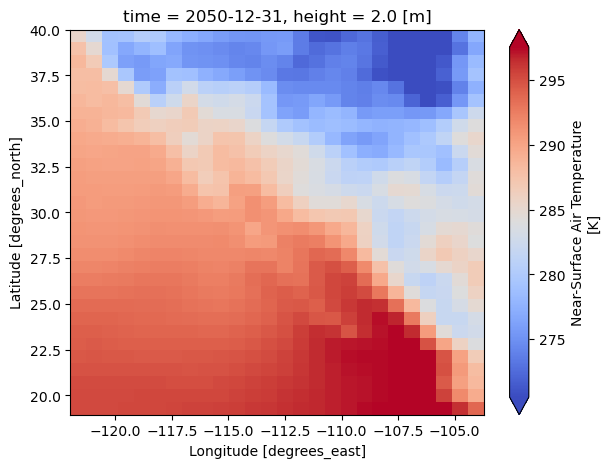

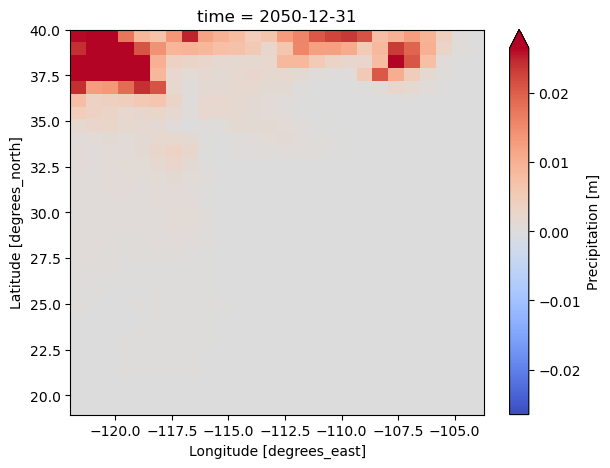

In [8]:
for file_name in [pcrglobwb_forcing.temperatureNC, pcrglobwb_forcing.precipitationNC]:
    dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{file_name}")
    print(dataset)
    print("------------------------")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)

## Regrid to ERA5 resolution

In [9]:
ERA5_forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_test/work/diagnostic/script",
)
print(ERA5_forcing)

PCRGlobWBForcing(
    start_time='1997-08-01T00:00:00Z',
    end_time='2000-08-31T00:00:00Z',
    directory=PosixPath('/home/emol/forcing/sonoran_desert_test/work/diagnostic/script'),
    shape=PosixPath('/home/emol/forcing/sonoran_desert_test/work/diagnostic/script/hysets_09488650.shp'),
    filenames={},
    precipitationNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1997-2000_hysets_09488650.nc',
    temperatureNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1997-2000_hysets_09488650.nc'
)

In [10]:
temperature_dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{pcrglobwb_forcing.temperatureNC}")
temperature_target = xr.load_dataset(f"{ERA5_forcing.directory}/{ERA5_forcing.temperatureNC}")

temperature_dataset.load()
temperature_dataset.close()
temperature_dataset = temperature_dataset.regrid.linear(temperature_target)
temperature_dataset.to_netcdf(f"{pcrglobwb_forcing.directory}/{pcrglobwb_forcing.temperatureNC}")

In [11]:
precipitation_dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{pcrglobwb_forcing.precipitationNC}")
precipitation_target = xr.load_dataset(f"{ERA5_forcing.directory}/{ERA5_forcing.precipitationNC}")

precipitation_dataset.load()
precipitation_dataset.close()
precipitation_dataset = precipitation_dataset.regrid.linear(precipitation_target)
precipitation_dataset.to_netcdf(f"{pcrglobwb_forcing.directory}/{pcrglobwb_forcing.precipitationNC}")

<xarray.Dataset> Size: 86MB
Dimensions:    (time: 9861, lat: 53, lon: 41, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 79kB 2024-01-02 2024-01-03 ... 2050-12-31
    height     float64 8B 2.0
  * lat        (lat) float32 212B 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * lon        (lon) float32 164B -118.0 -117.7 -117.5 ... -108.5 -108.2 -108.0
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 86MB 279.9 280.2 280.4 ... 297.3 297.4
    time_bnds  (time, bnds) datetime64[ns] 158kB 2024-01-01T12:00:00 ... 2050...
    lat_bnds   (lat, bnds) float32 424B 36.35 35.65 36.1 ... 22.9 23.35 22.65
    lon_bnds   (lon, bnds) float32 328B -118.4 -117.6 -118.1 ... -108.4 -107.6
Attributes: (12/45)
    Conventions:            CF-1.7
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time:            0.0
    branch_time_in_child:   60265.0D
    branch_time_in_parent:  60265.0D
    ...                     ...
    table_id:               day
    table_info:             Creation Date:(24 July 2019) MD5:70649eeb16bc90c4...
    title:                  EC-Earth3 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    caption:                Forcings for the PCR-GLOBWB hydrological model.

------------------------

<xarray.Dataset> Size: 86MB
Dimensions:    (time: 9861, lat: 53, lon: 41, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 79kB 2024-01-02 2024-01-03 ... 2050-12-31
  * lat        (lat) float32 212B 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * lon        (lon) float32 164B -118.0 -117.7 -117.5 ... -108.5 -108.2 -108.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 86MB -1.094e-23 ... -3.603e-23
    time_bnds  (time, bnds) datetime64[ns] 158kB 2024-01-01T12:00:00 ... 2050...
    lat_bnds   (lat, bnds) float32 424B 36.35 35.65 36.1 ... 22.9 23.35 22.65
    lon_bnds   (lon, bnds) float32 328B -118.4 -117.6 -118.1 ... -108.4 -107.6
Attributes: (12/45)
    Conventions:            CF-1.7
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time:            0.0
    branch_time_in_child:   60265.0D
    branch_time_in_parent:  60265.0D
    ...                     ...
    table_id:               day
    table_info:             Creation Date:(24 July 2019) MD5:70649eeb16bc90c4...
    title:                  EC-Earth3 output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    caption:                Forcings for the PCR-GLOBWB hydrological model.

------------------------

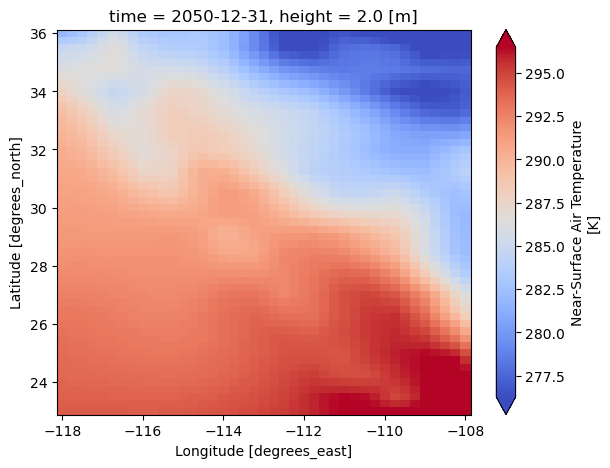

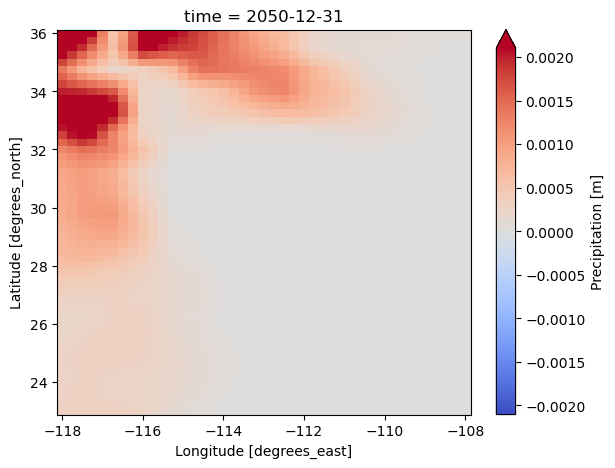

In [12]:
for file_name in [pcrglobwb_forcing.temperatureNC, pcrglobwb_forcing.precipitationNC]:
    dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{file_name}")
    print(dataset)
    print("------------------------")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)